# Continuation of Linear Regression with 2 variables
## Now we wish to find the values for our model using a 3d plot

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D

house_data = np.genfromtxt('./Datasets/area_br_price.txt', delimiter=',')
X = np.delete(house_data, 2, 1)
X = np.insert(X, 0, 1, axis=1)
Y = np.delete(house_data, [0,1], 1)

def normalizeFeatures (X):
    for i in range(1, np.shape(X)[1]):
        # isolate one of the features and normalize it
        feature = X.T[i]
        feature -= np.average(feature)
        feature /= (np.amax(feature) - np.amin(feature))
        
normalizeFeatures(X)

# Recall that thetaV looked l ike [350000,600000,-50000]
# However we wish ot improve that 
def costFunction (thetaV, X, Y):
    #Yt is the vector with the values that i think are correct
    dataPints = np.shape(Y)[0]
    Yt = np.dot(X, thetaV)
    Yt = Yt.reshape(dataPints, 1) #change shape so it will match Y as a column (T would not work)
    dif = Yt - Y
    sq = np.sqrt(np.square(dif))
    sm = np.sum(sq)
    avg = sm / dataPints
    cost = avg
    return cost # more or less represents how far away we are in avg to the real value

## Use Axes3D to plot the cost as a function of th1 and th2, leaving th0 constant

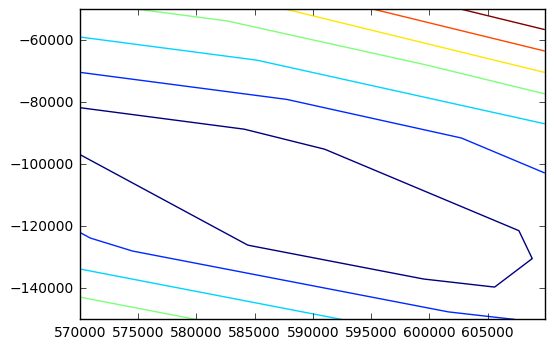

In [109]:
x_min = 570000
x_max = 610000
x_step = 100

y_min = -140000
y_max = -80000
y_step = 50

x = np.arange(x_min, x_max, x_step)
y = np.arange(y_min, y_max, y_step)
X_, Y_ = np.meshgrid(x, y)
zs = np.array([costFunction(np.array([350000, x, y]), X, Y) for x, y in zip(np.ravel(X_), np.ravel(Y_))])
Z = zs.reshape(X_.shape)

plt.figure()
CS = plt.contour(X_, Y_, Z)
plt.show()

## We really seem to have narroewd down our search
- Th0 =  350_000
- Th1 =  590_000
- Th2 = -120_000

In [89]:
costFunction(np.array([350000, 590000, -120000]), X, Y)

51577.001174056793

## $50_000 of average error is better than 70_000
### However lets now try to find a better Th0

In [106]:
mini = 300000
maxi = 400000
numSteps = 60 # <<<< Change that parameter
step = maxi/numSteps
iterations = int((maxi - mini)/step)

y = np.empty(iterations, dtype=np.float)
x = np.arange(mini, maxi, step)

for i in range(iterations):
    y[i] = costFunction(np.array([mini + i*step,590000,-120000]), X, Y)

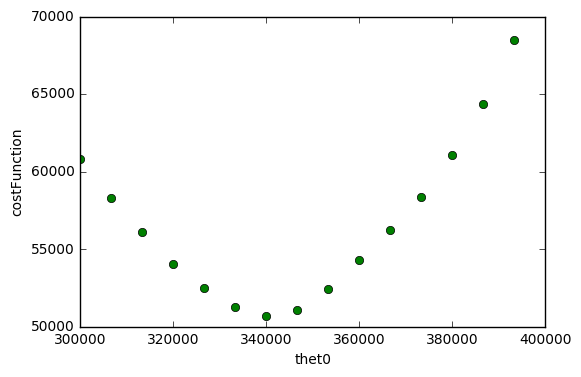

In [107]:
plt.plot(x, y, 'go')
plt.xlabel('thet0')
plt.ylabel('costFunction')
plt.show()

In [108]:
costFunction(np.array([340000, 590000, -120000]), X, Y)

50679.41372792497